## **Capstone Project Module 2**
Nama: Rahadian Yaumal Etantyo ,
Dataset: NYC TLC Trip Record

'Analisis Faktor yang Mempengaruhi Total Pendapatan Vendor Verifone.Inc'

Tujuan : Meningkatkan pendapatan total Vendor Verifone.Inc. melalui analisis



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

## **1. Load Data**

In [2]:
df = pd.read_csv('NYC TLC Trip Record.csv')
df

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2728\47389403.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('NYC TLC Trip Record.csv')


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN


## **2. Data Cleaning**

a. Cari Data Missing Value

In [3]:

df.isna().sum()

VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag        4324
RatecodeID                4324
PULocationID                 0
DOLocationID                 0
passenger_count           4324
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                68211
improvement_surcharge        0
total_amount                 0
payment_type              4324
trip_type                 4334
congestion_surcharge      4324
dtype: int64

Data yang missing ada di kolom:
store_and_fwd_flag,RatecodeID, passenger_count, ehail_fee(semuanya kosong),payment_type,trip_type,congestion_surcharge.

b. Mengcopy data agar tidak merubah file asli

In [4]:
df_new = df.copy()
df_new

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN


c. Mencari data yang duplikat

In [5]:
df_new.duplicated().sum()
#Tidak ditemukan data duplikat

0

d. Mengisi data yang kosong dengan Modus dan Median

In [6]:
#Mengisi missing value
#1. Store_and_fwd_flag (Categorical)
Storefwdflag = df_new['store_and_fwd_flag'].mode()[0]
df_new['store_and_fwd_flag'].fillna(Storefwdflag,inplace=True)
#2. RateCodeID (categorical)
Ratecodeid = df_new['RatecodeID'].mode()[0]
df_new['RatecodeID'].fillna(Ratecodeid, inplace=True)
df_new.loc[df_new['RatecodeID']==99,'RatecodeID']==Ratecodeid
#3.passenger count (numerical)
passcount = df_new['passenger_count'].median()
df_new['passenger_count'].fillna(passcount,inplace=True)
#4. Hapus kolom ehail fee karena tidak ada datanya sama sekali
df_new.drop('ehail_fee',axis=1)
#5. Payment type (categorical)
pymenttype = df_new['payment_type'].mode()[0]
df_new['payment_type'].fillna(pymenttype,inplace=True)
#6. Trip type (categorical)
triptype = df_new['trip_type'].mode()[0]
df_new['trip_type'].fillna(triptype,inplace=True)
#7. congestion_surcharge (numerikal)
csurcharge = df_new['congestion_surcharge'].median()
df_new['congestion_surcharge'].fillna(csurcharge,inplace=True)
#8. Hapus kolom ehail_fee karena sama sekali tidak ada nilainya
df_new.drop('ehail_fee',axis=1,inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2728\1250196463.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_new['store_and_fwd_flag'].fillna(Storefwdflag,inplace=True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2728\1250196463.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [7]:
df_new

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,N,1.0,49,62,1.0,4070.82,15.70,0.0,0.0,0.00,0.0,1.0,16.70,1.0,1.0,0.00
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,N,1.0,10,205,1.0,2.14,4.41,0.0,0.0,0.00,0.0,1.0,5.41,1.0,1.0,0.00
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,N,1.0,66,37,1.0,3.44,16.53,0.0,0.0,3.51,0.0,1.0,21.04,1.0,1.0,0.00
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,N,1.0,225,189,1.0,3.03,14.98,0.0,0.0,3.20,0.0,1.0,19.18,1.0,1.0,0.00


e. Menghapus baris dengan passenger count = 0(artinya ada taxi yang tanpa penumpang tapi tercatat seperti membawa penumpang)
dihapus karena data berjumlah 336 dan hanya 0,49% dari total keseluruhan data.

In [8]:
df_new = df_new[df_new['passenger_count']!=0]
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67875 entries, 0 to 68210
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               67875 non-null  int64  
 1   lpep_pickup_datetime   67875 non-null  object 
 2   lpep_dropoff_datetime  67875 non-null  object 
 3   store_and_fwd_flag     67875 non-null  object 
 4   RatecodeID             67875 non-null  float64
 5   PULocationID           67875 non-null  int64  
 6   DOLocationID           67875 non-null  int64  
 7   passenger_count        67875 non-null  float64
 8   trip_distance          67875 non-null  float64
 9   fare_amount            67875 non-null  float64
 10  extra                  67875 non-null  float64
 11  mta_tax                67875 non-null  float64
 12  tip_amount             67875 non-null  float64
 13  tolls_amount           67875 non-null  float64
 14  improvement_surcharge  67875 non-null  float64
 15  total_a

f. Mengubah nama beberapa data nomor menjadi nama category di beberapa kolom

In [9]:
vendor_map = {
    1: 'Creative MT, LLC.',
    2: 'VeriFone Inc.'
}
df_new['VendorID'] = df_new['VendorID'].map(vendor_map)

def store(x):
    if x == 'Y':
        return 'store and forward trip'
    elif x == 'N':
        return 'not a store and forward trip'
df_new['store_and_fwd_flag'] = df_new['store_and_fwd_flag'].apply(store)
df_new['RatecodeID'] = df_new['RatecodeID'].map({
    1.0: 'Standard rate',
    2.0: 'JFK',
    3.0: 'Newark',
    4.0: 'Nassau or Westchester',
    5.0: 'Negotiated fare',
    6.0: 'Group ride'})
df_new['payment_type']=df_new['payment_type'].map({
    1.0: 'Credit card',
    2.0: 'Cash',
    3.0: 'No charge',
    4.0: 'Dispute',
    5.0: 'Unknown',
    6.0: 'Voided trip'})  
df_new['trip_type']=df_new['trip_type'].map({
    1.0: 'Street-hail',
    2.0: 'Dispatch'})

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2728\4136344173.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['VendorID'] = df_new['VendorID'].map(vendor_map)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2728\4136344173.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['store_and_fwd_flag'] = df_new['store_and_fwd_flag'].apply(store)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2728\4136344173.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [10]:
df_new

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,VeriFone Inc.,2023-01-01 00:26:10,2023-01-01 00:37:11,not a store and forward trip,Standard rate,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,1.0,24.18,Credit card,Street-hail,2.75
1,VeriFone Inc.,2023-01-01 00:51:03,2023-01-01 00:57:49,not a store and forward trip,Standard rate,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,1.0,15.84,Credit card,Street-hail,0.00
2,VeriFone Inc.,2023-01-01 00:35:12,2023-01-01 00:41:32,not a store and forward trip,Standard rate,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,1.0,11.64,Credit card,Street-hail,0.00
3,"Creative MT, LLC.",2023-01-01 00:13:14,2023-01-01 00:19:03,not a store and forward trip,Standard rate,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,1.0,10.20,Credit card,Street-hail,0.00
4,"Creative MT, LLC.",2023-01-01 00:33:04,2023-01-01 00:39:02,not a store and forward trip,Standard rate,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,1.0,8.00,Credit card,Street-hail,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,VeriFone Inc.,2023-01-31 22:29:00,2023-01-31 22:42:00,not a store and forward trip,Standard rate,49,62,1.0,4070.82,15.70,0.0,0.0,0.00,0.0,1.0,16.70,Credit card,Street-hail,0.00
68207,VeriFone Inc.,2023-01-31 22:40:00,2023-01-31 22:48:00,not a store and forward trip,Standard rate,10,205,1.0,2.14,4.41,0.0,0.0,0.00,0.0,1.0,5.41,Credit card,Street-hail,0.00
68208,VeriFone Inc.,2023-01-31 23:46:00,2023-02-01 00:02:00,not a store and forward trip,Standard rate,66,37,1.0,3.44,16.53,0.0,0.0,3.51,0.0,1.0,21.04,Credit card,Street-hail,0.00
68209,VeriFone Inc.,2023-01-31 23:01:00,2023-01-31 23:19:00,not a store and forward trip,Standard rate,225,189,1.0,3.03,14.98,0.0,0.0,3.20,0.0,1.0,19.18,Credit card,Street-hail,0.00


## **2. Data Formatting**

a.Mengubah format data yang belum sesuai

In [11]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67875 entries, 0 to 68210
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               67875 non-null  object 
 1   lpep_pickup_datetime   67875 non-null  object 
 2   lpep_dropoff_datetime  67875 non-null  object 
 3   store_and_fwd_flag     67875 non-null  object 
 4   RatecodeID             67865 non-null  object 
 5   PULocationID           67875 non-null  int64  
 6   DOLocationID           67875 non-null  int64  
 7   passenger_count        67875 non-null  float64
 8   trip_distance          67875 non-null  float64
 9   fare_amount            67875 non-null  float64
 10  extra                  67875 non-null  float64
 11  mta_tax                67875 non-null  float64
 12  tip_amount             67875 non-null  float64
 13  tolls_amount           67875 non-null  float64
 14  improvement_surcharge  67875 non-null  float64
 15  total_a

b. Mengubah format ke date time di kolom lpep_pickup_datetime dan lpep_dropoff_datetime

In [12]:
#formatting
#date time
date_time = ['lpep_pickup_datetime','lpep_dropoff_datetime']
for d in date_time:
    df_new[d] = pd.to_datetime(df_new[d])

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2728\488472670.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[d] = pd.to_datetime(df_new[d])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2728\488472670.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[d] = pd.to_datetime(df_new[d])


c.Mengubah format ke category di beberapa kolom 'VendorID','store_and_fwd_flag','RatecodeID','payment_type','trip_type'

In [13]:
#category
category = ['VendorID','store_and_fwd_flag','RatecodeID','payment_type','trip_type']
for c in category:
    df_new[c] = df_new[c].astype('category')

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2728\2365072596.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[c] = df_new[c].astype('category')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2728\2365072596.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[c] = df_new[c].astype('category')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2728\2365072596.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

d. Mengubah tipe data ke integer di kolom 'passenger_count'

In [14]:
#integer
df_new['passenger_count'] = df_new['passenger_count'].astype('Int64') 

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2728\769378307.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['passenger_count'] = df_new['passenger_count'].astype('Int64')


In [15]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67875 entries, 0 to 68210
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               67875 non-null  category      
 1   lpep_pickup_datetime   67875 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  67875 non-null  datetime64[ns]
 3   store_and_fwd_flag     67875 non-null  category      
 4   RatecodeID             67865 non-null  category      
 5   PULocationID           67875 non-null  int64         
 6   DOLocationID           67875 non-null  int64         
 7   passenger_count        67875 non-null  Int64         
 8   trip_distance          67875 non-null  float64       
 9   fare_amount            67875 non-null  float64       
 10  extra                  67875 non-null  float64       
 11  mta_tax                67875 non-null  float64       
 12  tip_amount             67875 non-null  float64       
 13  tolls_

e. Mengubah nama beberapa kolom agar lebih rapi (VendorID,passenger_count,RatecodeID','Rate Code','lpep_pickup_datetime','PickUp_Time' 'lpep_dropoff_datetime')

In [16]:
#Ubah nama kolom
df_new = df_new.rename(columns={
    'VendorID': 'Vendor',
    'passenger_count': 'Passenger Count',
    'RatecodeID': 'Rate Code',
    'lpep_pickup_datetime' : 'PickUp_Time',
    'lpep_dropoff_datetime' : 'DropOff_Time'})
df_new

,Vendor,PickUp_Time,DropOff_Time,store_and_fwd_flag,Rate Code,PULocationID,DOLocationID,Passenger Count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,VeriFone Inc.,2023-01-01 00:26:10,2023-01-01 00:37:11,not a store and forward trip,Standard rate,166,143,1,2.58,14.90,1.0,0.5,4.03,0.0,1.0,24.18,Credit card,Street-hail,2.75
1,VeriFone Inc.,2023-01-01 00:51:03,2023-01-01 00:57:49,not a store and forward trip,Standard rate,24,43,1,1.81,10.70,1.0,0.5,2.64,0.0,1.0,15.84,Credit card,Street-hail,0.00
2,VeriFone Inc.,2023-01-01 00:35:12,2023-01-01 00:41:32,not a store and forward trip,Standard rate,223,179,1,0.00,7.20,1.0,0.5,1.94,0.0,1.0,11.64,Credit card,Street-hail,0.00
3,"Creative MT, LLC.",2023-01-01 00:13:14,2023-01-01 00:19:03,not a store and forward trip,Standard rate,41,238,1,1.30,6.50,0.5,1.5,1.70,0.0,1.0,10.20,Credit card,Street-hail,0.00
4,"Creative MT, LLC.",2023-01-01 00:33:04,2023-01-01 00:39:02,not a store and forward trip,Standard rate,41,74,1,1.10,6.00,0.5,1.5,0.00,0.0,1.0,8.00,Credit card,Street-hail,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,VeriFone Inc.,2023-01-31 22:29:00,2023-01-31 22:42:00,not a store and forward trip,Standard rate,49,62,1,4070.82,15.70,0.0,0.0,0.00,0.0,1.0,16.70,Credit card,Street-hail,0.00
68207,VeriFone Inc.,2023-01-31 22:40:00,2023-01-31 22:48:00,not a store and forward trip,Standard rate,10,205,1,2.14,4.41,0.0,0.0,0.00,0.0,1.0,5.41,Credit card,Street-hail,0.00
68208,VeriFone Inc.,2023-01-31 23:46:00,2023-02-01 00:02:00,not a store and forward trip,Standard rate,66,37,1,3.44,16.53,0.0,0.0,3.51,0.0,1.0,21.04,Credit card,Street-hail,0.00
68209,VeriFone Inc.,2023-01-31 23:01:00,2023-01-31 23:19:00,not a store and forward trip,Standard rate,225,189,1,3.03,14.98,0.0,0.0,3.20,0.0,1.0,19.18,Credit card,Street-hail,0.00


f. Menambahkan kolom hari dari pickup time untuk keperluan analisis

In [17]:
df_new['day'] = df_new['PickUp_Time'].dt.day_name()

## **3.Analisis Data Vendor Verifone Inc.**

a.Menyaring data hanya vendor VeriFone Inc.

In [18]:
df_verifone = df_new[df_new['Vendor']== 'VeriFone Inc.'].reset_index().drop(columns='index')
df_verifone

,Vendor,PickUp_Time,DropOff_Time,store_and_fwd_flag,Rate Code,PULocationID,DOLocationID,Passenger Count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,day
0,VeriFone Inc.,2023-01-01 00:26:10,2023-01-01 00:37:11,not a store and forward trip,Standard rate,166,143,1,2.58,14.90,1.0,0.5,4.03,0.0,1.0,24.18,Credit card,Street-hail,2.75,Sunday
1,VeriFone Inc.,2023-01-01 00:51:03,2023-01-01 00:57:49,not a store and forward trip,Standard rate,24,43,1,1.81,10.70,1.0,0.5,2.64,0.0,1.0,15.84,Credit card,Street-hail,0.00,Sunday
2,VeriFone Inc.,2023-01-01 00:35:12,2023-01-01 00:41:32,not a store and forward trip,Standard rate,223,179,1,0.00,7.20,1.0,0.5,1.94,0.0,1.0,11.64,Credit card,Street-hail,0.00,Sunday
3,VeriFone Inc.,2023-01-01 00:53:31,2023-01-01 01:11:04,not a store and forward trip,Standard rate,41,262,1,2.78,17.70,1.0,0.5,0.00,0.0,1.0,22.95,Cash,Street-hail,2.75,Sunday
4,VeriFone Inc.,2023-01-01 00:11:58,2023-01-01 00:24:55,not a store and forward trip,Standard rate,24,75,1,1.88,14.20,1.0,0.5,0.00,0.0,1.0,16.70,Cash,Street-hail,0.00,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58839,VeriFone Inc.,2023-01-31 22:29:00,2023-01-31 22:42:00,not a store and forward trip,Standard rate,49,62,1,4070.82,15.70,0.0,0.0,0.00,0.0,1.0,16.70,Credit card,Street-hail,0.00,Tuesday
58840,VeriFone Inc.,2023-01-31 22:40:00,2023-01-31 22:48:00,not a store and forward trip,Standard rate,10,205,1,2.14,4.41,0.0,0.0,0.00,0.0,1.0,5.41,Credit card,Street-hail,0.00,Tuesday
58841,VeriFone Inc.,2023-01-31 23:46:00,2023-02-01 00:02:00,not a store and forward trip,Standard rate,66,37,1,3.44,16.53,0.0,0.0,3.51,0.0,1.0,21.04,Credit card,Street-hail,0.00,Tuesday
58842,VeriFone Inc.,2023-01-31 23:01:00,2023-01-31 23:19:00,not a store and forward trip,Standard rate,225,189,1,3.03,14.98,0.0,0.0,3.20,0.0,1.0,19.18,Credit card,Street-hail,0.00,Tuesday


b.Uji Normalitas Data pada Kolom Total Amount

<Axes: xlabel='total_amount', ylabel='Count'>

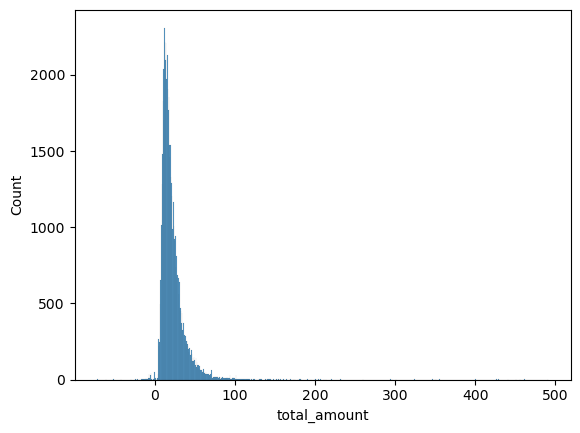

In [19]:
sns.histplot(data=df_verifone,x='total_amount')

In [20]:
df_verifone['total_amount'].skew()


6.265699255089545

skew > 0 --> Right skewed --> Data total amount tidak terdistribusi normal

In [21]:
df_verifone['total_amount'].kurtosis()


112.61443375408993

kurtosis > 3 --> Leptokurtic --> Data total amount menjulang keatas / Tidak terdistribusi normal

<Axes: xlabel='total_amount'>

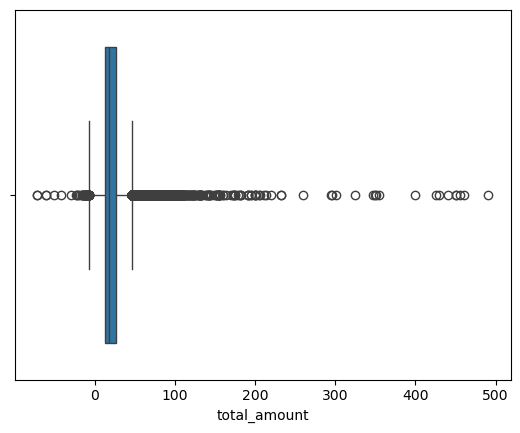

In [22]:
sns.boxplot(data=df_verifone,x='total_amount')

Terdapat Banyak data outlier yang mempengaruhi kualitas data dan hanya akan menggunakan data di antara lower bound dan upper bound untuk mendapatkan rentang data yang valid

In [23]:
df_verifone['total_amount'].mean()

21.910776629732855

In [24]:
df_verifone['total_amount'].median()

17.94

Mencari Q1 dan Q3 untuk mengetahui lower bound dan upper bound

In [25]:
Q1 = df_verifone['total_amount'].describe()['25%']
Q1

12.96

In [26]:
Q3 = df_verifone['total_amount'].describe()['75%']
Q3

26.27

In [27]:
IQR = Q3 - Q1
IQR

13.309999999999999

In [28]:
LB = Q1 - 1.5 * IQR
UB = Q3 + 1.5 * IQR
LB,UB

(-7.0049999999999955, 46.235)

Mendapatkan nilai Lower Bound di -7.0049999999999955 dan upper bound di 46.235

In [29]:
df_verifone.describe()

,PickUp_Time,DropOff_Time,PULocationID,DOLocationID,Passenger Count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,58844,58844,58844.000000,58844.000000,58844.0,58844.000000,58844.000000,58844.000000,58844.000000,58844.000000,58844.000000,58844.000000,58844.000000,58844.000000
mean,2023-01-16 19:45:33.101335808,2023-01-16 20:04:03.256321792,98.250204,138.366376,1.325352,9.051403,16.639309,0.756815,0.448958,2.213986,0.162077,0.946020,21.910777,0.679627
min,2009-01-01 20:21:27,2009-01-02 11:07:31,1.000000,1.000000,1.0,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,-1.000000,-71.500000,-2.750000
25%,2023-01-09 11:44:42.249999872,2023-01-09 12:00:27.249999872,74.000000,74.000000,1.0,1.160000,9.300000,0.000000,0.500000,0.000000,0.000000,1.000000,12.960000,0.000000
50%,2023-01-17 08:44:16,2023-01-17 08:59:07,75.000000,138.000000,1.0,1.890000,13.500000,0.000000,0.500000,1.750000,0.000000,1.000000,17.940000,0.000000
75%,2023-01-24 15:48:54.500000,2023-01-24 16:05:44.500000,129.000000,217.000000,1.0,3.290000,19.800000,1.000000,0.500000,3.410000,0.000000,1.000000,26.270000,0.000000
max,2023-02-01 03:10:05,2023-02-01 17:27:05,265.000000,265.000000,9.0,120098.840000,490.000000,12.500000,0.500000,222.220000,36.050000,1.000000,491.000000,2.750000
std,NaN,NaN,60.853406,76.381551,1.000282,629.951449,13.731617,1.193935,0.155942,3.126394,1.075257,0.206556,15.800311,1.186468


b. Menghindari data outlier maka akan mengambil data antara rentang lower bound dan upper bound

In [30]:

df_update = df_verifone[(df_verifone['total_amount']>=LB)&(df_verifone['total_amount']<=UB)].reset_index().drop(columns = 'index')
df_update


,Vendor,PickUp_Time,DropOff_Time,store_and_fwd_flag,Rate Code,PULocationID,DOLocationID,Passenger Count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,day
0,VeriFone Inc.,2023-01-01 00:26:10,2023-01-01 00:37:11,not a store and forward trip,Standard rate,166,143,1,2.58,14.90,1.0,0.5,4.03,0.0,1.0,24.18,Credit card,Street-hail,2.75,Sunday
1,VeriFone Inc.,2023-01-01 00:51:03,2023-01-01 00:57:49,not a store and forward trip,Standard rate,24,43,1,1.81,10.70,1.0,0.5,2.64,0.0,1.0,15.84,Credit card,Street-hail,0.00,Sunday
2,VeriFone Inc.,2023-01-01 00:35:12,2023-01-01 00:41:32,not a store and forward trip,Standard rate,223,179,1,0.00,7.20,1.0,0.5,1.94,0.0,1.0,11.64,Credit card,Street-hail,0.00,Sunday
3,VeriFone Inc.,2023-01-01 00:53:31,2023-01-01 01:11:04,not a store and forward trip,Standard rate,41,262,1,2.78,17.70,1.0,0.5,0.00,0.0,1.0,22.95,Cash,Street-hail,2.75,Sunday
4,VeriFone Inc.,2023-01-01 00:11:58,2023-01-01 00:24:55,not a store and forward trip,Standard rate,24,75,1,1.88,14.20,1.0,0.5,0.00,0.0,1.0,16.70,Cash,Street-hail,0.00,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55390,VeriFone Inc.,2023-01-31 22:29:00,2023-01-31 22:42:00,not a store and forward trip,Standard rate,49,62,1,4070.82,15.70,0.0,0.0,0.00,0.0,1.0,16.70,Credit card,Street-hail,0.00,Tuesday
55391,VeriFone Inc.,2023-01-31 22:40:00,2023-01-31 22:48:00,not a store and forward trip,Standard rate,10,205,1,2.14,4.41,0.0,0.0,0.00,0.0,1.0,5.41,Credit card,Street-hail,0.00,Tuesday
55392,VeriFone Inc.,2023-01-31 23:46:00,2023-02-01 00:02:00,not a store and forward trip,Standard rate,66,37,1,3.44,16.53,0.0,0.0,3.51,0.0,1.0,21.04,Credit card,Street-hail,0.00,Tuesday
55393,VeriFone Inc.,2023-01-31 23:01:00,2023-01-31 23:19:00,not a store and forward trip,Standard rate,225,189,1,3.03,14.98,0.0,0.0,3.20,0.0,1.0,19.18,Credit card,Street-hail,0.00,Tuesday


c.Menyimpan data baru yang sudah terbebas dari outlier

In [31]:
df_update.to_csv('data_update.csv')

## **4.Proses Analisis Data Vendor yang Sudah terbebas dari Outlier**

Analisis Faktor yang mempengaruhi Total Amount / total pendapatan pada vendor VeriFone Inc.

a.Mengetahui hubungan trip_distance dengan total amount

<Axes: xlabel='trip_distance', ylabel='total_amount'>

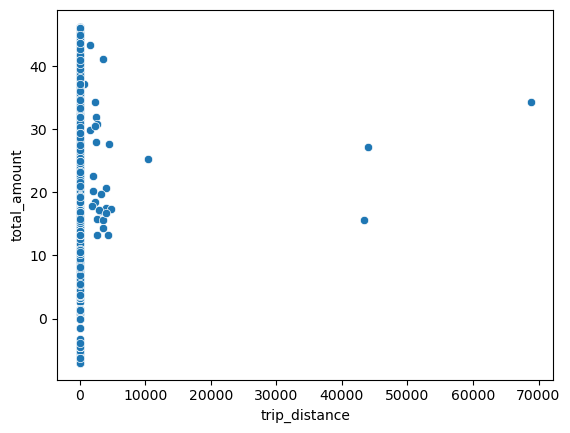

In [32]:
sns.scatterplot(data=df_update,x='trip_distance',y='total_amount')

In [33]:
df_update['total_amount'].corr(df_update['trip_distance'])

0.011210727296240031

Hubungan dari total amount dengan trip distance sangat lemah, dapat disimpulkan bahwa trip distance tidak mempengaruhi total amount/total pendapatan

b. Hubungan antara passenger count dengan total amount

<Axes: xlabel='Passenger Count', ylabel='total_amount'>

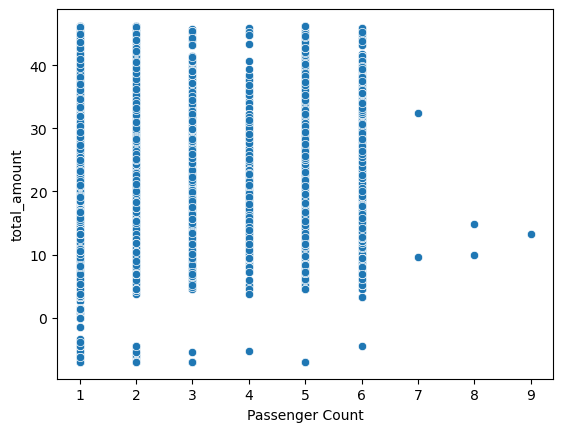

In [34]:
sns.scatterplot(data=df_update,x='Passenger Count',y='total_amount')

In [35]:
df_update['Passenger Count'].corr(df_update['total_amount'])

-0.0011880562189505348

Hubungan dari total amount dengan passenger count sangat lemah dan berbanding terbalik karena nilainya negatif, dapat disimpulkan bahwa passenger count tidak mempengaruhi total amount/total pendapatan

c. Hubungan antara PULocationID dengan Total Amount

<Axes: xlabel='PULocationID', ylabel='total_amount'>

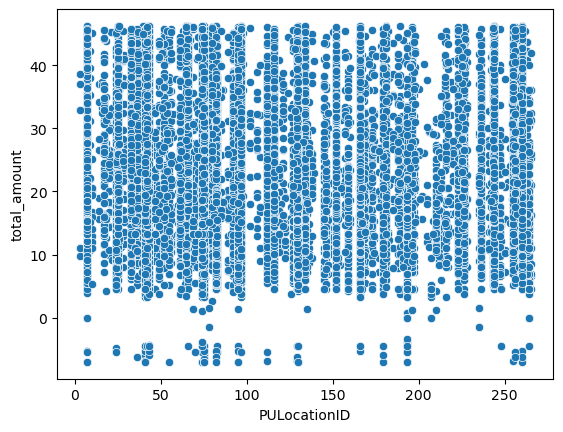

In [36]:
sns.scatterplot(data=df_update,x='PULocationID',y='total_amount')

In [37]:
df_update['PULocationID'].corr(df_update['total_amount'])

0.06160431807049377

Hubungan dari total amount dengan PULocationID sangat lemah, dapat disimpulkan bahwa PULocationID tidak mempengaruhi total amount/total pendapatan

d. Hubungan antara DOLocationID dengan Total Amount

<Axes: xlabel='DOLocationID', ylabel='total_amount'>

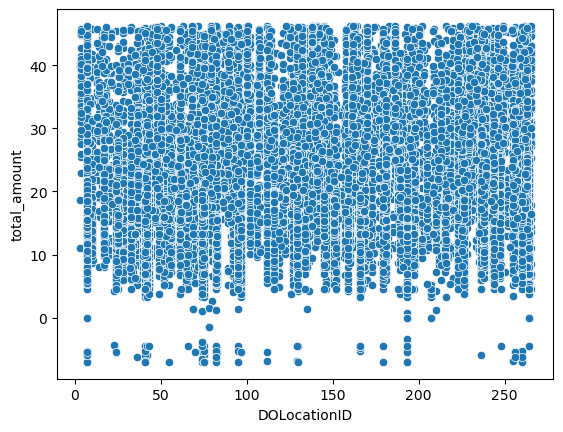

In [38]:
sns.scatterplot(data=df_update,x='DOLocationID',y='total_amount')

In [39]:
df_update['DOLocationID'].corr(df_update['total_amount'])

0.21953641771753152

Hubungan dari total amount dengan DOLocationID sangat lemah, dapat disimpulkan bahwa PULocationID tidak mempengaruhi total amount/total pendapatan

e. Hubungan fare amount dengan total amount

<Axes: xlabel='fare_amount', ylabel='total_amount'>

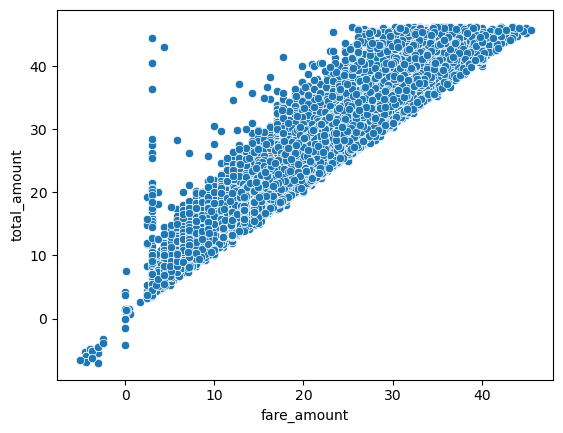

In [40]:
sns.scatterplot(data=df_update,x='fare_amount',y='total_amount')

In [41]:
df_update['fare_amount'].corr(df_update['total_amount'])

0.9424285851149399

Hubungan dari total amount dengan fare amount sangat kuat, dapat disimpulkan bahwa fare amount sangat mempengaruhi total amount/total pendapatan

f. Hubungan antara tip dengan total amount

<Axes: xlabel='tip_amount', ylabel='total_amount'>

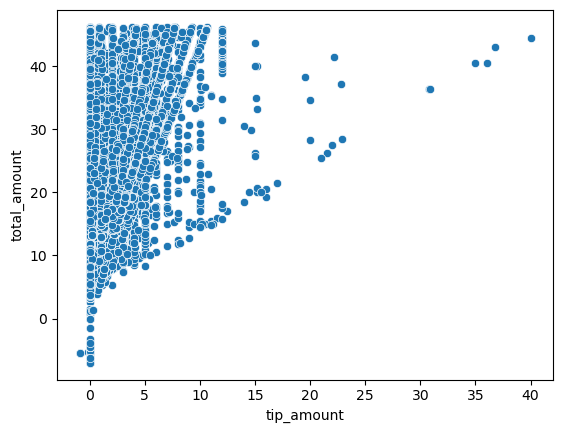

In [42]:
sns.scatterplot(data=df_update,x='tip_amount',y='total_amount')

In [43]:
df_update['tip_amount'].corr(df_update['total_amount'])

0.5336360973853204

Hubungan dari total amount dengan tip amount moderat, dapat disimpulkan bahwa tip amount cukup kuat untuk mempengaruhi total amount/total pendapatan

g. Hubungan Antara hari dengan total pendapatan

<Axes: xlabel='day', ylabel='total_amount'>

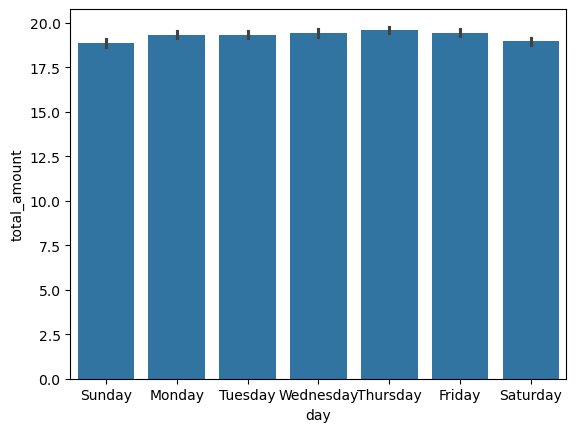

In [44]:
order_hari = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

df_update['day'] = pd.Categorical(df_update['day'], categories=order_hari, ordered=True)
total_per_day = df_update.sort_values('day')
sns.barplot(data=total_per_day,x='day',y='total_amount')

In [45]:
from scipy.stats import f_oneway
data_per_day = [df_update[df_update['day'] == hari]['total_amount'] for hari in order_hari]
#H0 : Total amount per day tidak berbeda secara signifikan
#Ha : Total amount per day berbeda signifikan

# ANOVA
f_stat, p_value = f_oneway(*data_per_day)
f_stat, p_value
#pvalue < 0.05 total amount per day berbeda signifikan

(6.2824462995112444, 1.295444468995561e-06)

pvalue < 0.05 maka dapat disimpulkan bahwa total amount per day berbeda signifikan

h. Hubungan antara tipe payment dengan total amount

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2728\2289789042.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  paymentype = df_update.groupby('payment_type')[['total_amount']].sum().reset_index()


<Axes: xlabel='payment_type', ylabel='total_amount'>

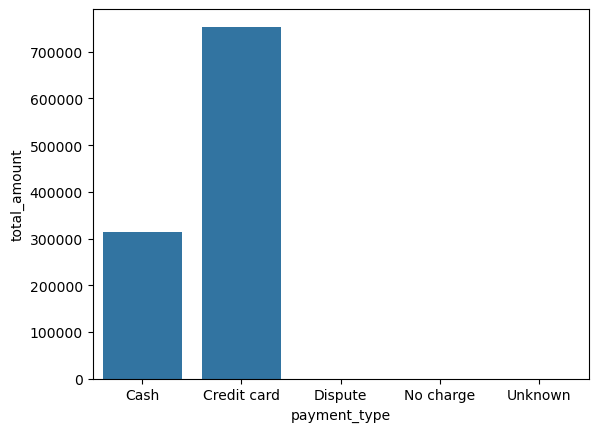

In [46]:
paymentype = df_update.groupby('payment_type')[['total_amount']].sum().reset_index()
sns.barplot(data=paymentype,x='payment_type',y='total_amount')

Uji T test (Categori dan numerik)

In [47]:
# Uji Hipotesis credit card vs cash
# H0: Tidak ada perbedaan signifikan dalam total amount antara pembayaran cash dan credit card.
# Ha: Ada perbedaan signifikan dalam  total amount  antara pembayaran cash dan credit card.
creditcard = df_update.loc[df_update['payment_type'] == 'Credit card', 'total_amount']
cash = df_update.loc[df_update['payment_type'] == 'Cash', 'total_amount']

from scipy.stats import ttest_ind
stats, pvalue = ttest_ind(a=creditcard, b=cash, alternative='two-sided')

stats,p_value 


(56.36442838496457, 1.295444468995561e-06)

pvalue <0.05 maka ada perbedaan signifikan antara tipe payment terhadap total amount

i. Hubungan rate code dengan total amount

<Axes: xlabel='Rate Code', ylabel='total_amount'>

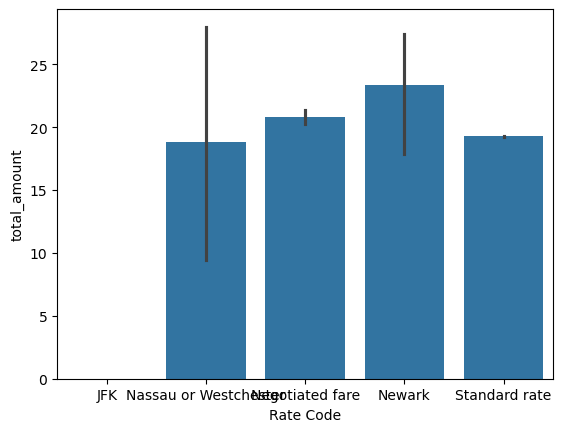

In [48]:
sns.barplot(data=df_update,x='Rate Code',y='total_amount')

Uji Anova

In [49]:

from scipy.stats import f_oneway
NW = df_update.loc[df_update['Rate Code'] == 'Nassau or Westchester', 'total_amount']
N_Fare = df_update.loc[df_update['Rate Code'] == 'Negotiated fare', 'total_amount']
Newark = df_update.loc[df_update['Rate Code'] == 'Newark', 'total_amount']
srate = df_update.loc[df_update['Rate Code'] == 'Standard rate', 'total_amount']


In [50]:
# H0: Tidak ada perbedaan signifikan dalam total amount antar Rate Code.
# Ha: Ada perbedaan signifikan dalam  total amount  antar Rate Code.

stats, pvalue = f_oneway(NW,N_Fare,Newark,srate)
stats,pvalue

(11.79760956722346, 1.0117008799246227e-07)

pvalue < 0.05 maka menerima Ha dan dapat disimpulkan bahwa ada perbedaan signifikan antar rate code terhadap total amount. JFK tidak dimasukkan karena memang tidak ada datanya